# Step 1 (Data Collection)

In [1]:
#import beberapa library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#melakukan koneksi ke datasheet yang ada di google drive
from google.colab import drive
drive.mount('/content/drive')
import sys

Mounted at /content/drive


In [3]:
#melakukan koneksi ke dataset yang ada di google drive
dt = pd.read_csv('/content/drive/ My Drive/data_balita.csv')

In [4]:
#Menampilkan 5 datasheet teratas
dt.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [5]:
dt

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


# Step 2 (Data Review)

In [6]:
#Cek tipe data
dt.dtypes

,0
Umur (bulan),int64
Jenis Kelamin,object
Tinggi Badan (cm),float64
Status Gizi,object


In [7]:
# Telaah data secara statistik deskriptif/rincian data
dt.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [8]:
#cek missing value
dt.isnull().sum()

,0
Umur (bulan),0
Jenis Kelamin,0
Tinggi Badan (cm),0
Status Gizi,0


In [9]:
#Identifikasi data unik dari atribut
dt.nunique()

,0
Umur (bulan),61
Jenis Kelamin,2
Tinggi Badan (cm),6800
Status Gizi,4


# Step 3 (Change Variabel dst)

In [26]:
rename_cols = {'Umur (bulan)': 'Age(months)','Jenis Kelamin':'Gender','Tinggi Badan (cm)':'Height(cm)','Status Gizi':'Status'}
dt = dt.rename(columns=rename_cols)

In [27]:
dt

,Age(months),Gender,Height(cm),Status
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [29]:
#Cek tipe data
dt.dtypes

,0
Age(months),int64
Gender,object
Height(cm),float64
Status,object


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dt['Gender'] = label_encoder.fit_transform(dt['Gender'])
dt['Status'].replace({'tinggi':'tall'},inplace=True)

<ipython-input-30-e8d90968e3f2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Status'].replace({'tinggi':'tall'},inplace=True)


In [31]:
#Cek tipe data
dt.dtypes

,0
Age(months),int64
Gender,int64
Height(cm),float64
Status,object


In [32]:
# Mengumpulkan kolom-kolom yang akan diubah tipe datanya pada 1 list
kolom_diubah = ['Status']

dt[kolom_diubah] = dt[kolom_diubah].astype('category')\

dt.dtypes

,0
Age(months),int64
Gender,int64
Height(cm),float64
Status,category


In [33]:

# Membulatkan kolom 'Tinggi' ke satu angka di belakang koma
dt['Height(cm)'] = dt['Height(cm)'].round(1)

print("Data tinggi badan berhasil dibulatkan!")


Data tinggi badan berhasil dibulatkan!


In [34]:
print(dt.head())

   Age(months)  Gender  Height(cm)            Status
0            0       0        44.6           stunted
1            0       0        56.7              tall
2            0       0        46.9            normal
3            0       0        47.5            normal
4            0       0        42.7  severely stunted


In [35]:
dt

,Age(months),Gender,Height(cm),Status
0,0,0,44.6,stunted
1,0,0,56.7,tall
2,0,0,46.9,normal
3,0,0,47.5,normal
4,0,0,42.7,severely stunted
...,...,...,...,...
120994,60,1,100.6,normal
120995,60,1,98.3,stunted
120996,60,1,121.3,normal
120997,60,1,112.2,normal


In [37]:
dt.Gender.value_counts()

,count
Gender,
1,61002
0,59997


In [38]:
dt.Status.value_counts()

,count
Status,
normal,67755
severely stunted,19869
tall,19560
stunted,13815


# Step 4 (Undersampling)

In [39]:
# Data Prep Undersampling
X = dt.drop(columns=['Status'])  # Semua kolom kecuali 'status'
y = dt['Status']                # Kolom target

In [40]:
from collections import Counter

# Hitung distribusi kategori
print(Counter(y))


Counter({'normal': 67755, 'severely stunted': 19869, 'tall': 19560, 'stunted': 13815})


In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Membuat objek RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Menerapkan undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [42]:
print(Counter(y_resampled))

Counter({'normal': 13815, 'severely stunted': 13815, 'stunted': 13815, 'tall': 13815})


In [44]:
from collections import Counter

# Menghitung distribusi data setelah undersampling
counter_resampled = Counter(y_resampled)

# Membuat DataFrame untuk menampilkan hasil
dt_distribution = pd.DataFrame.from_dict(counter_resampled, orient='index', columns=['Jumlah'])
dt_distribution.index.name = 'Kategori'
dt_distribution.reset_index(inplace=True)

# Menampilkan tabel
print(dt_distribution)

           Kategori  Jumlah
0            normal   13815
1  severely stunted   13815
2           stunted   13815
3              tall   13815


In [45]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Melatih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi pada data testing
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))  # Hasil evaluasi
print(confusion_matrix(y_test, y_pred))      # Confusion matrix

                  precision    recall  f1-score   support

          normal       1.00      0.99      0.99      4201
severely stunted       1.00      1.00      1.00      4089
         stunted       0.99      1.00      0.99      4145
            tall       1.00      1.00      1.00      4143

        accuracy                           1.00     16578
       macro avg       1.00      1.00      1.00     16578
    weighted avg       1.00      1.00      1.00     16578

[[4168    0   18   15]
 [   0 4079   10    0]
 [   8    7 4130    0]
 [   5    0    0 4138]]


In [47]:
# Menghitung distribusi target setelah resampling
print(Counter(y_resampled))

# Alternatif: Tampilkan sebagai tabel
counter_resampled = Counter(y_resampled)
dt_distribution = pd.DataFrame.from_dict(counter_resampled, orient='index', columns=['Jumlah'])
dt_distribution.index.name = 'Kategori'
dt_distribution.reset_index(inplace=True)
print(dt_distribution)

Counter({'normal': 13815, 'severely stunted': 13815, 'stunted': 13815, 'tall': 13815})
           Kategori  Jumlah
0            normal   13815
1  severely stunted   13815
2           stunted   13815
3              tall   13815


In [48]:
dt['Status'] = y_resampled  # Pastikan kolom Status diperbarui dengan hasil resampling

# Sekarang, periksa distribusi status di DataFrame dt
print(dt['Status'].value_counts())


Status
normal              13815
severely stunted    13815
stunted             13815
tall                13815
Name: count, dtype: int64


In [49]:
print(len(dt))  # Jumlah baris pada DataFrame
print(len(y_resampled))  # Jumlah setelah undersampling

120999
55260


In [50]:
# Menghapus baris yang memiliki missing values pada kolom Status
dt.dropna(subset=['Status'], inplace=True)

# Memeriksa jumlah baris setelah penghapusan
print(len(dt))  # Jumlah baris setelah missing values dihapus


55260


In [51]:
#mengecek kembali jumlah missing value
dt.isnull().sum()

,0
Age(months),0
Gender,0
Height(cm),0
Status,0


In [52]:
dt

,Age(months),Gender,Height(cm),Status
0,0,0,44.6,stunted
1,0,0,56.7,tall
5,0,0,44.3,stunted
8,0,0,45.3,stunted
12,0,0,43.5,severely stunted
...,...,...,...,...
120986,60,1,113.0,normal
120990,60,1,99.3,stunted
120991,60,1,91.4,severely stunted
120992,60,1,123.9,tall


# Step 5 (Data Validation)

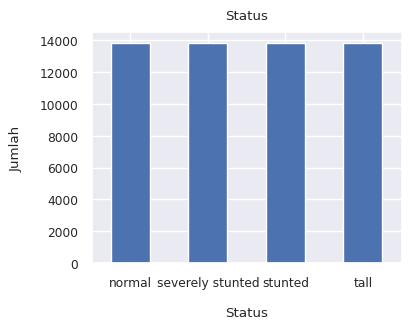

In [53]:
#Bar
sns.set(font_scale=0.8)
dt['Status'].value_counts().plot(kind='bar', figsize=(4, 3), rot=0)
plt.xlabel("Status", labelpad=12)
plt.ylabel("Jumlah", labelpad=12)
plt.title("Status", y=1.02);

In [54]:
chart = dt.copy()

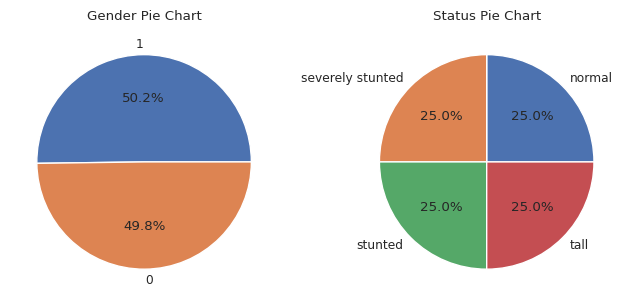

In [56]:
fig,axes = plt.subplots(1,2)
axes[0].pie(chart['Gender'].value_counts(),labels=chart['Gender'].value_counts().index,autopct = '%1.1f%%')
axes[0].set_title('Gender Pie Chart')
axes[1].pie(chart['Status'].value_counts(),labels=chart['Status'].value_counts().index,autopct = '%1.1f%%')
axes[1].set_title('Status Pie Chart')
plt.tight_layout()
plt.show()

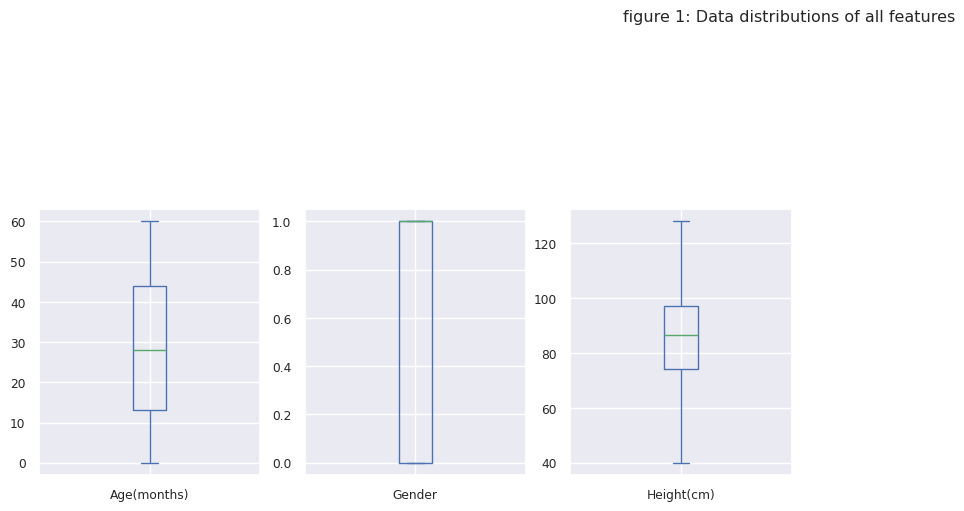

In [57]:
dt.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [58]:
#Pengecekan Keunikan data category
dt.nunique()

,0
Age(months),61
Gender,2
Height(cm),878
Status,4


In [59]:
#mengecek kembali jumlah missing value
dt.isnull().sum()

,0
Age(months),0
Gender,0
Height(cm),0
Status,0


In [61]:
dt.describe()

,Age(months),Gender,Height(cm)
count,55260.000000,55260.000000,55260.000000
mean,28.936500,0.502135,85.807287
std,17.747294,0.500000,17.510666
min,0.000000,0.000000,40.000000
25%,13.000000,0.000000,74.100000
50%,28.000000,1.000000,86.400000
75%,44.000000,1.000000,97.000000
max,60.000000,1.000000,128.000000


In [62]:
dt

,Age(months),Gender,Height(cm),Status
0,0,0,44.6,stunted
1,0,0,56.7,tall
5,0,0,44.3,stunted
8,0,0,45.3,stunted
12,0,0,43.5,severely stunted
...,...,...,...,...
120986,60,1,113.0,normal
120990,60,1,99.3,stunted
120991,60,1,91.4,severely stunted
120992,60,1,123.9,tall


In [64]:
dt.dtypes

,0
Age(months),int64
Gender,int64
Height(cm),float64
Status,category


# Step 6 (Data Construction)

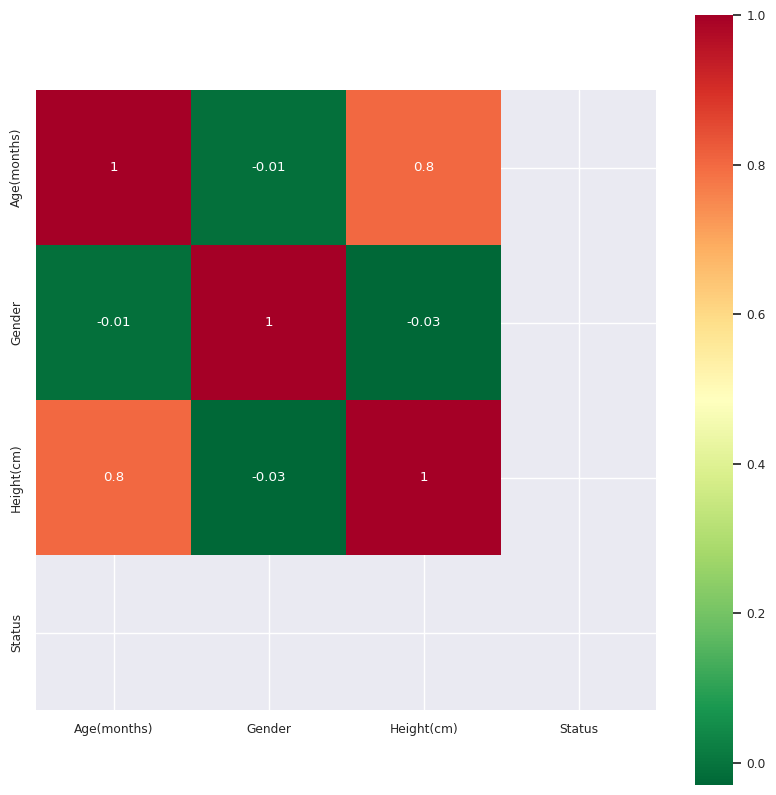

In [76]:
# Correlation Heatmap
correlation = dt.apply(pd.to_numeric, errors='coerce').corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# Step 7 (Define Feature and Lable)

In [77]:
target='Status'

In [78]:
# Membagi data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [79]:
X = dt.loc[:,dt.columns!=target]
y = dt.loc[:,dt.columns==target]

In [80]:
X

,Age(months),Gender,Height(cm)
0,0,0,44.6
1,0,0,56.7
5,0,0,44.3
8,0,0,45.3
12,0,0,43.5
...,...,...,...
120986,60,1,113.0
120990,60,1,99.3
120991,60,1,91.4
120992,60,1,123.9


In [81]:
y

,Status
0,stunted
1,tall
5,stunted
8,stunted
12,severely stunted
...,...
120986,normal
120990,stunted
120991,severely stunted
120992,tall


In [82]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Memeriksa dimensi data setelah pembagian
print('X train = ', X_train.shape)
print('X test = ', X_test.shape)
print('y train = ', y_train.shape)  # Perbaiki menjadi y_train
print('y test = ', y_test.shape)    # Perbaiki menjadi y_test

X train =  (38682, 3)
X test =  (16578, 3)
y train =  (38682,)
y test =  (16578,)


# Step 8 (Build Model)

In [87]:
# Melatih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi pada data testing
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))  # Hasil evaluasi
print(confusion_matrix(y_test, y_pred))      # Confusion matrix

                  precision    recall  f1-score   support

          normal       1.00      0.99      0.99      4201
severely stunted       1.00      1.00      1.00      4089
         stunted       0.99      1.00      0.99      4145
            tall       1.00      1.00      1.00      4143

        accuracy                           1.00     16578
       macro avg       1.00      1.00      1.00     16578
    weighted avg       1.00      1.00      1.00     16578

[[4168    0   18   15]
 [   0 4079   10    0]
 [   8    7 4130    0]
 [   5    0    0 4138]]


In [89]:
# Import yang diperlukan
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Pastikan variabel konsisten, gunakan y_train, y_test
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada data test
predictions = model.predict(X_test)

# Membuat confusion matrix
confusion_array = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print(confusion_array)

[[4168    0   18   15]
 [   0 4079   10    0]
 [   8    7 4130    0]
 [   5    0    0 4138]]


# Step 9 (Model Evaluation)

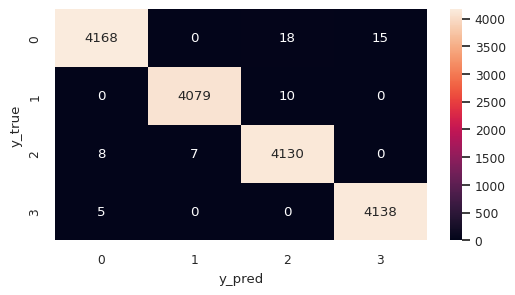

In [86]:
# Visualisasi confusion matrix dengan heatmap
f, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")  # Mengganti y_head menjadi y_pred
plt.ylabel("y_true")
plt.show()


# Step 10 (Model Review)

In [91]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
confusion_array = confusion_matrix(y_test, y_pred)

# Menampilkan nilai True Positive (TP), False Negative (FN), True Negative (TN), False Positive (FP)
print('TP = ', confusion_array[1, 1])  # True Positive (positif yang diprediksi benar)
print('FN = ', confusion_array[1, 0])  # False Negative (positif yang diprediksi salah)
print('TN = ', confusion_array[0, 0])  # True Negative (negatif yang diprediksi benar)
print('FP = ', confusion_array[0, 1])  # False Positive (negatif yang diprediksi salah)


TP =  4079
FN =  0
TN =  4168
FP =  0


In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

          normal       1.00      0.99      0.99      4201
severely stunted       1.00      1.00      1.00      4089
         stunted       0.99      1.00      0.99      4145
            tall       1.00      1.00      1.00      4143

        accuracy                           1.00     16578
       macro avg       1.00      1.00      1.00     16578
    weighted avg       1.00      1.00      1.00     16578



In [93]:
from io import StringIO
from sklearn import tree
from IPython.display import Image

In [97]:
from sklearn.tree import DecisionTreeClassifier

# Menyusun model dengan max_depth
model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Misalnya max_depth=5
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

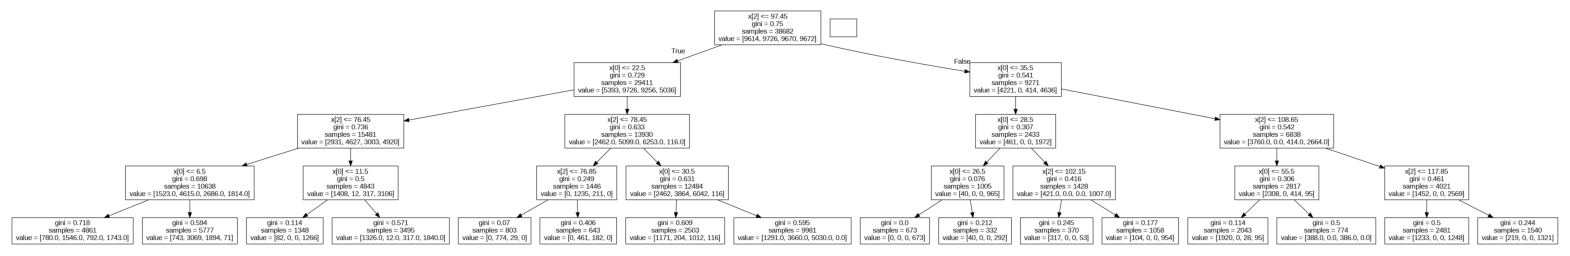

In [98]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

out = StringIO()
export_graphviz(model, out_file=out)
graph = pydotplus.graph_from_dot_data(out.getvalue())

# Simpan gambar sebagai file PNG
graph.write_png("tree.png")

# Menampilkan gambar dengan matplotlib
img = plt.imread('tree.png')
plt.figure(figsize=(20, 30))  # Atur ukuran sesuai keinginan Anda
plt.imshow(img)
plt.axis('off')  # Menghilangkan axis
plt.show()


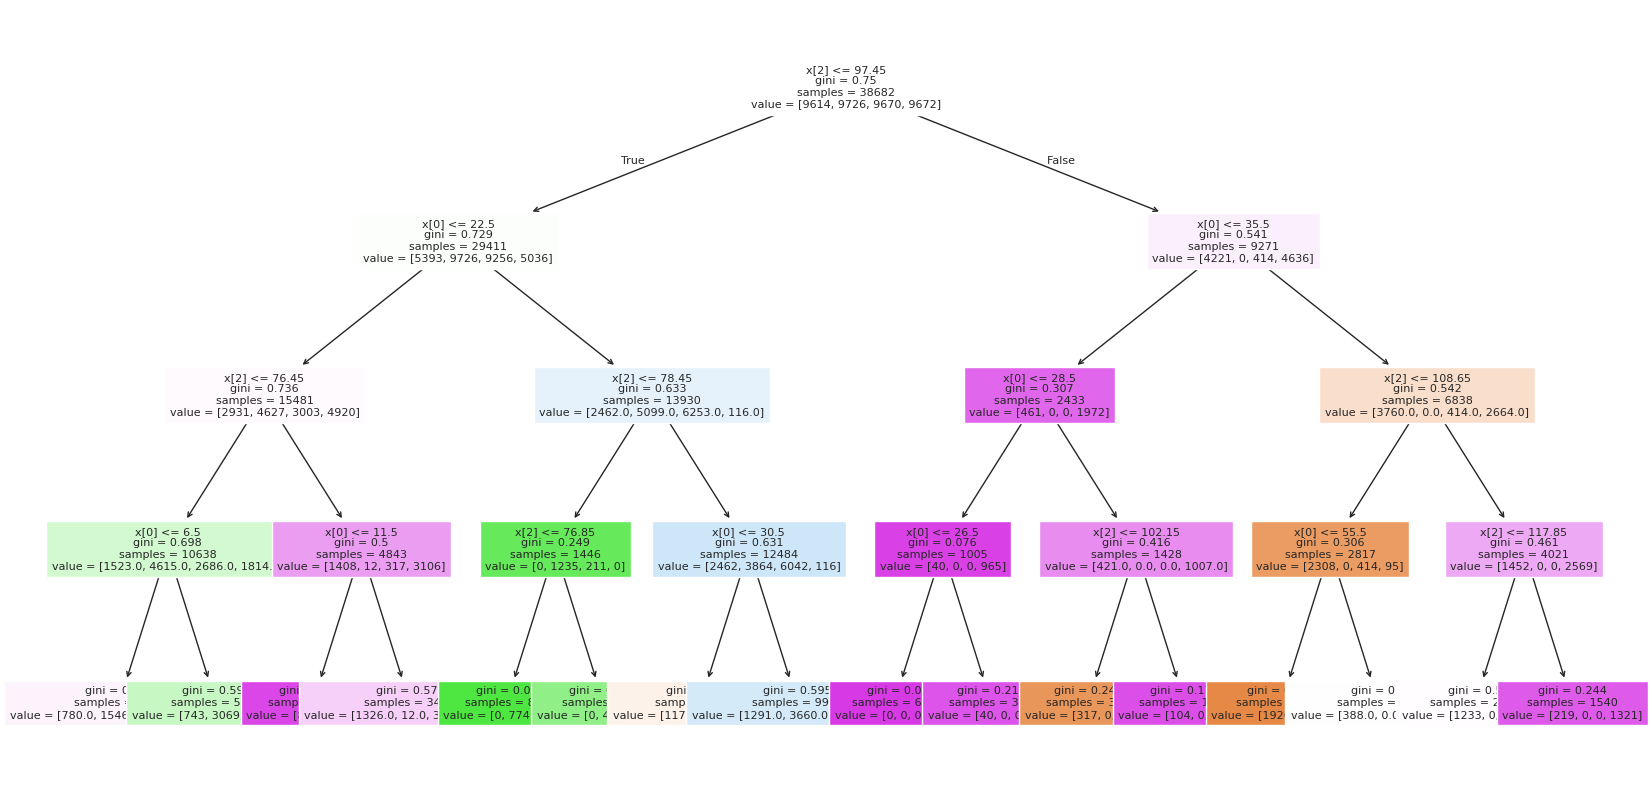

In [99]:
import matplotlib.pyplot as plt
from sklearn import tree

# Menyusun model dengan kedalaman yang lebih dangkal (optional)
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
model.fit(X_train, y_train)

# Menampilkan plot pohon keputusan
plt.figure(figsize=(20, 10))  # Ukuran gambar lebih besar
tree.plot_tree(model, filled=True, fontsize=8)  # Memperbesar ukuran font

# Menampilkan gambar
plt.show()

# Step 11 (Save Model)

In [100]:
# importjoblib
import joblib

# Contoh melatih model (misalnya, menggunakan DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi classifier
classifier = DecisionTreeClassifier()

# Misalnya X_train dan y_train adalah data pelatihan
classifier.fit(X_train, y_train)

# Simpan model dengan joblib
path = '/content/drive/My Drive/Colab Notebooks/Models/stunting_klasifikasi.joblib'
joblib.dump(classifier, path)

print(f"Model berhasil disimpan di: {path}")

Model berhasil disimpan di: /content/drive/My Drive/Colab Notebooks/Models/stunting_klasifikasi.joblib


# Step 12 (Load Model Data, and Check Result)

In [101]:
# Tentukan path lengkap ke file model yang telah disimpan
model_path = '/content/drive/My Drive/Colab Notebooks/Models/stunting_klasifikasi.joblib'

# Memuat model yang telah disimpan
model = joblib.load(model_path)

print("Model berhasil dimuat!")

Model berhasil dimuat!


In [108]:
import joblib
import pandas as pd

# Load model
model_path = '/content/drive/My Drive/Colab Notebooks/Models/stunting_klasifikasi.joblib'  # Ganti dengan nama file model Anda
model = joblib.load(model_path)

# Data baru untuk pengujian (1 data saja)
data_baru = pd.DataFrame({
    'Age(months)': [0],  # Pastikan nama kolom sesuai dengan yang digunakan saat pelatihan
    'Gender': [0],       # Laki-laki: 0
    'Height(cm)': [44.5]  # Menggunakan titik untuk pemisah desimal
})

# Prediksi hasil
prediksi = model.predict(data_baru)

# Menambahkan hasil prediksi ke dalam kolom Status
# Jika hasil prediksi sudah berupa string, langsung masukkan ke dalam kolom 'Status'
data_baru['Status'] = prediksi[0]  # Hasil prediksi sudah berupa string (misal: 'Stunted')

# Tampilkan hasil
print(data_baru)





   Age(months)  Gender  Height(cm)   Status
0            0       0        44.5  stunted


In [109]:
# Data baru untuk pengujian (1 data saja)
data_baru = pd.DataFrame({
    'Age(months)': [0],  # Pastikan nama kolom sesuai dengan yang digunakan saat pelatihan
    'Gender': [0],       # Laki-laki: 0
    'Height(cm)': [56.7]  # Menggunakan titik untuk pemisah desimal
})

# Prediksi hasil
prediksi = model.predict(data_baru)

# Menambahkan hasil prediksi ke dalam kolom Status
# Jika hasil prediksi sudah berupa string, langsung masukkan ke dalam kolom 'Status'
data_baru['Status'] = prediksi[0]  # Hasil prediksi sudah berupa string (misal: 'Stunted')

# Tampilkan hasil
print(data_baru)


   Age(months)  Gender  Height(cm) Status
0            0       0        56.7   tall


In [110]:
# Data baru untuk pengujian (1 data saja)
data_baru = pd.DataFrame({
    'Age(months)': [0],  # Pastikan nama kolom sesuai dengan yang digunakan saat pelatihan
    'Gender': [0],       # Laki-laki: 0
    'Height(cm)': [46.8]  # Menggunakan titik untuk pemisah desimal
})

# Prediksi hasil
prediksi = model.predict(data_baru)

# Menambahkan hasil prediksi ke dalam kolom Status
# Jika hasil prediksi sudah berupa string, langsung masukkan ke dalam kolom 'Status'
data_baru['Status'] = prediksi[0]  # Hasil prediksi sudah berupa string (misal: 'Stunted')

# Tampilkan hasil
print(data_baru)

   Age(months)  Gender  Height(cm)  Status
0            0       0        46.8  normal


In [111]:
# Data baru untuk pengujian (1 data saja)
data_baru = pd.DataFrame({
    'Age(months)': [1],  # Pastikan nama kolom sesuai dengan yang digunakan saat pelatihan
    'Gender': [0],       # Laki-laki: 0
    'Height(cm)': [41.0]  # Menggunakan titik untuk pemisah desimal
})

# Prediksi hasil
prediksi = model.predict(data_baru)

# Menambahkan hasil prediksi ke dalam kolom Status
# Jika hasil prediksi sudah berupa string, langsung masukkan ke dalam kolom 'Status'
data_baru['Status'] = prediksi[0]  # Hasil prediksi sudah berupa string (misal: 'Stunted')

# Tampilkan hasil
print(data_baru)

   Age(months)  Gender  Height(cm)            Status
0            1       0        41.0  severely stunted


In [114]:
# Data baru untuk pengujian (1 data saja)
data_baru = pd.DataFrame({
    'Age(months)': [40],  # Pastikan nama kolom sesuai dengan yang digunakan saat pelatihan
    'Gender': [1],       # Laki-laki: 0
    'Height(cm)': [140.0]  # Menggunakan titik untuk pemisah desimal
})

# Prediksi hasil
prediksi = model.predict(data_baru)

# Menambahkan hasil prediksi ke dalam kolom Status
# Jika hasil prediksi sudah berupa string, langsung masukkan ke dalam kolom 'Status'
data_baru['Status'] = prediksi[0]  # Hasil prediksi sudah berupa string (misal: 'Stunted')

# Tampilkan hasil
print(data_baru)

   Age(months)  Gender  Height(cm) Status
0           40       1       140.0   tall


In [116]:
# Data baru untuk pengujian (1 data saja)
data_baru = pd.DataFrame({
    'Age(months)': [2],  # Pastikan nama kolom sesuai dengan yang digunakan saat pelatihan
    'Gender': [1],       # Laki-laki: 0
    'Height(cm)': [370]  # Menggunakan titik untuk pemisah desimal
})

# Prediksi hasil
prediksi = model.predict(data_baru)

# Menambahkan hasil prediksi ke dalam kolom Status
# Jika hasil prediksi sudah berupa string, langsung masukkan ke dalam kolom 'Status'
data_baru['Status'] = prediksi[0]  # Hasil prediksi sudah berupa string (misal: 'Stunted')

# Tampilkan hasil
print(data_baru)

   Age(months)  Gender  Height(cm) Status
0            2       1         370   tall
